# 라이브러리 불러오기

In [79]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set_style("whitegrid")

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

import warnings
warnings.filterwarnings('ignore')

# 데이터 불러오기

* train: 신용카드 사용자들의 개인 신상정보 - credit(y) 열 포함 - (26457, 20)
* test: 신용카드 사용자들의 개인 신상정보 - credit(y) 열 미포함 - (10000, 19)
* submission: 정답 제출 파일 - (10000, 4) 

In [3]:
train = pd.read_csv('C:/Users/USER/DACON/creditcard/train.csv')
test = pd.read_csv('C:/Users/USER/DACON/creditcard/test.csv')
submission = pd.read_csv('C:/Users/USER/DACON/creditcard/sample_submission.csv')

# Train data EDA

## 데이터 확인하기

In [16]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [17]:
train.FLAG_MOBIL.unique()

array([1], dtype=int64)

In [18]:
train.work_phone.unique()

array([0, 1], dtype=int64)

* FLAG_MOBIL와 work_phone 변수의 상위 5개의 관측값이 모두 동일하길래 확인한 결과, 
* FLAG_MOBIL의 관측이 모두 1로 이루어져 있으므로 제거하고 진행해도 될 것 같음

## 데이터 타입 확인하기

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
index            26457 non-null int64
gender           26457 non-null object
car              26457 non-null object
reality          26457 non-null object
child_num        26457 non-null int64
income_total     26457 non-null float64
income_type      26457 non-null object
edu_type         26457 non-null object
family_type      26457 non-null object
house_type       26457 non-null object
DAYS_BIRTH       26457 non-null int64
DAYS_EMPLOYED    26457 non-null int64
FLAG_MOBIL       26457 non-null int64
work_phone       26457 non-null int64
phone            26457 non-null int64
email            26457 non-null int64
occyp_type       18286 non-null object
family_size      26457 non-null float64
begin_month      26457 non-null float64
credit           26457 non-null float64
dtypes: float64(4), int64(8), object(8)
memory usage: 4.0+ MB


#### 범주형(명목형/순서형):


* 명목형: 인코딩 시 순서가 존재하지 않는 변수

    gender: 성별
    
    car: 차량 소유 여부

    reality: 부동산 소유 여부

    FLAG_MOBIL: 핸드폰 소유 여부

    work_phone: 업무용 전화 소유 여부

    phone: 전화 소유 여부

    email: 이메일 소유 여부

    income_type: 소득 유형

    family_type: 가족 유형

    house_type: 주거 유형

    occyp_type: 직업 유형
    

* 순서형: 인코딩 시 순서가 존재하는 변수

    edu_type: 교육 수준

    credit: 신용 수준
    

#### 수치형(이산형/연속형):


* 이산형: 이산적인 값을 가지는 변수(정수)

    family_size: 가족 구성원 수

    child_num: 아이 수

    DAYS_BIRTH

    DAYS_EMPLOYED 


* 연속형: 연속적인 값을 가지는 변수(실수)

    income_total

    begin_month

## 결측값 확인하기

In [8]:
train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [14]:
train.occyp_type.nunique()

18

* occpy_type 변수에 많은 결측값 존재
* null값 제외, 18개의 unique한 값을 가짐
* 그냥 제거하기엔 중요한 특성일 수 있을 것 같음
* 따라서 null값을 백수와 같은 하나의 직업 유형으로 보는 것도 고려해봐야 될 것 같음 

## Response Variable 

* credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도
* 이번 분석의 반응변수로, 높을수록 신용도가 안 좋은 것을 의미

In [77]:
train_y = train['credit'].astype(int)

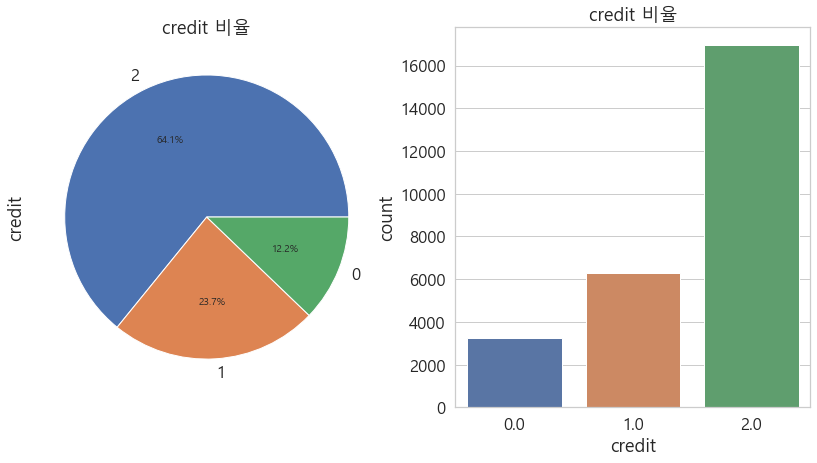

In [80]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))

train_y.value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('credit 비율')

sns.countplot('credit', data=train, ax=ax[1])
ax[1].set_title('credit 비율')

plt.show()

* 신용도가 낮은 신용카드 사용자가 많은 비율을 차지하고 있음을 확인 가능
* 또한 아주 심하진 않지만 클래스 불균형에 대해서도 생각해봐야 될 것 같음 

## Categorical Features

* 모든 변수에서 큰 차이를 보이지 않음
* *EDA 방법상의 문제일수도 있을 것 같음 - 평균으로 비교한게 잘못됐나?

### gender

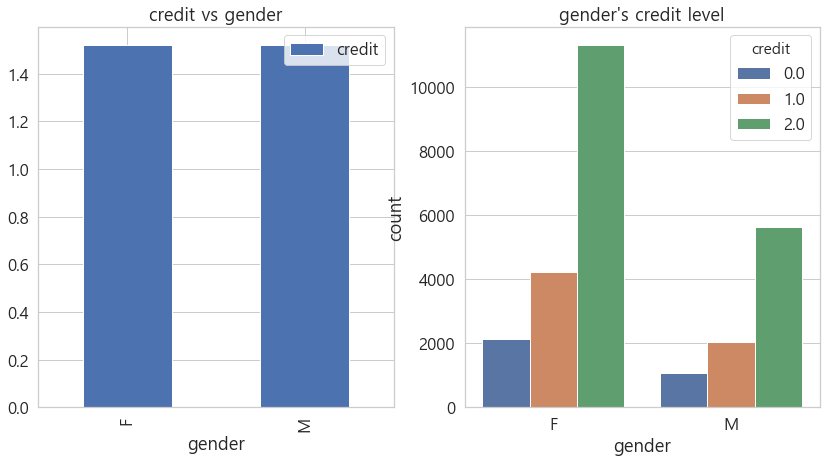

In [88]:
f, ax=plt.subplots(1,2,figsize=(14,7))

# 성별에 따른 신용도 평균 비교
train[['gender','credit']].groupby(['gender']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs gender')

# 성별에 따른 신용도
sns.countplot('gender',hue='credit',data=train,ax=ax[1])
ax[1].set_title("gender's credit level")

plt.show()

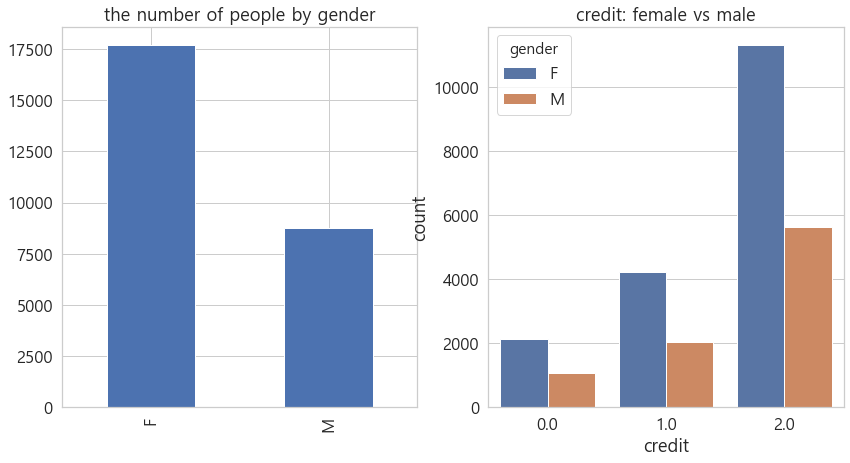

In [83]:
f,ax=plt.subplots(1,2,figsize=(14,7))

# 성별의 분포
train['gender'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('the number of people by gender')

# 성별에 따른 신용도 분포
sns.countplot('credit', hue='gender',data=train, ax=ax[1])
ax[1].set_title('credit: female vs male')

plt.show()

* 성별의 분포를 보면 여성이 남성의 약 2배 정도로 관측되었음을 확인 가능
* 성별에 따른 신용도 평균이 비슷함을 확인 가능
* 성별에 따른 신용도에서 각 신용도 별로 약 2배 차이나는 것을 보아 여성과 남성의 관측수만 다를 뿐 신용도 분포 자체는 비슷함을 확인할 수 있음
* 두 성별 모두 신용도가 낮은 관측이 더 많지만, 이 역시도 데이터 불균형에 의한 결과일 듯함
* 즉, 성별은 신용도에 뚜렷한 영향을 미치지 않는 변수일 듯함

### car

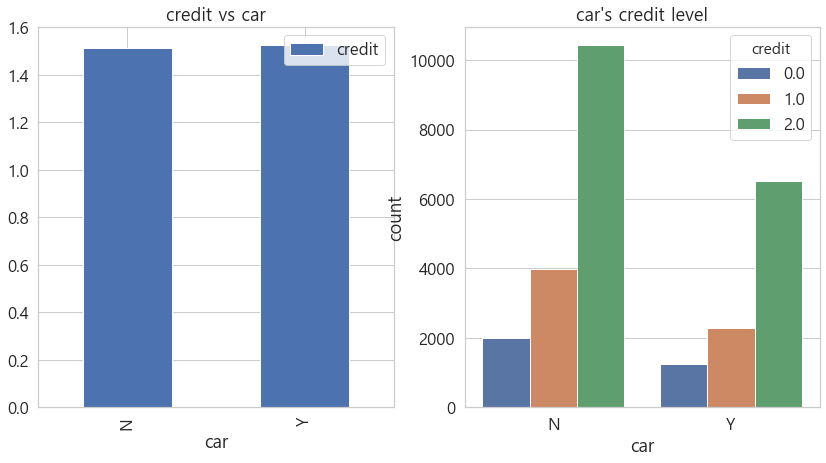

In [82]:
f,ax=plt.subplots(1,2,figsize=(14,7))

# 자동차 유무에 따른 신용도 평균
train[['car','credit']].groupby(['car']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs car')

# 자동차 유무에 따른 신용도
sns.countplot('car',hue='credit',data=train,ax=ax[1])
ax[1].set_title("car's credit level")

plt.show()

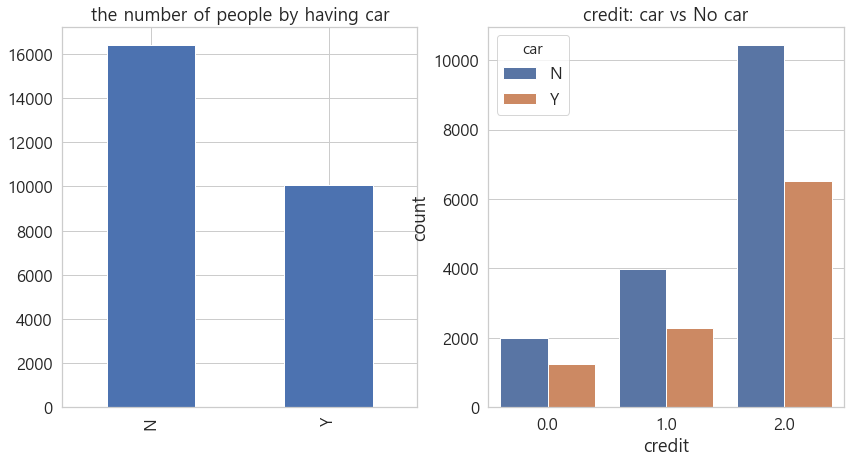

In [84]:
f,ax=plt.subplots(1,2,figsize=(14,7))

train['car'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('the number of people by having car')

sns.countplot('credit',hue='car',data=train,ax=ax[1])
ax[1].set_title('credit: car vs No car')

plt.show()

* 자동차 유무도 성별과 유사한 결과를 보임
* 즉, 관측수 차이를 제외하고는 비슷한 분포를 가지고 있음 
* 역시 신용도에 큰 영향을 미치는 변수는 아닐 것 같음

### reailty

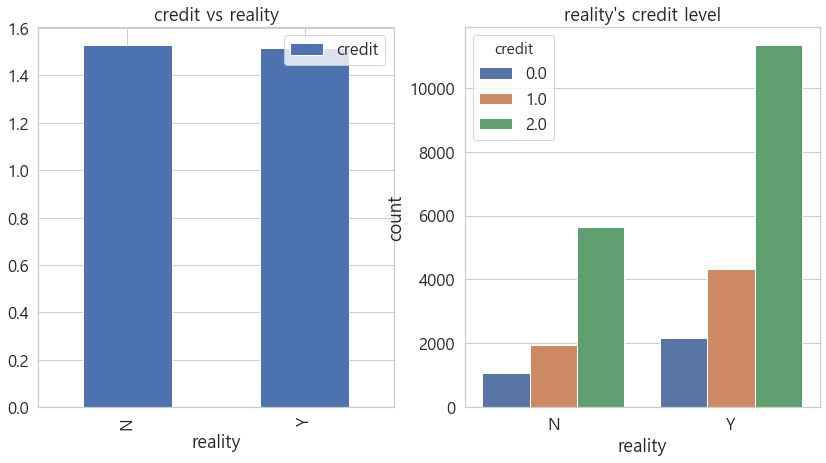

In [85]:
f,ax=plt.subplots(1,2,figsize=(14,7))

train[['reality','credit']].groupby(['reality']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs reality')

sns.countplot('reality',hue='credit',data=train,ax=ax[1])
ax[1].set_title("reality's credit level")

plt.show()

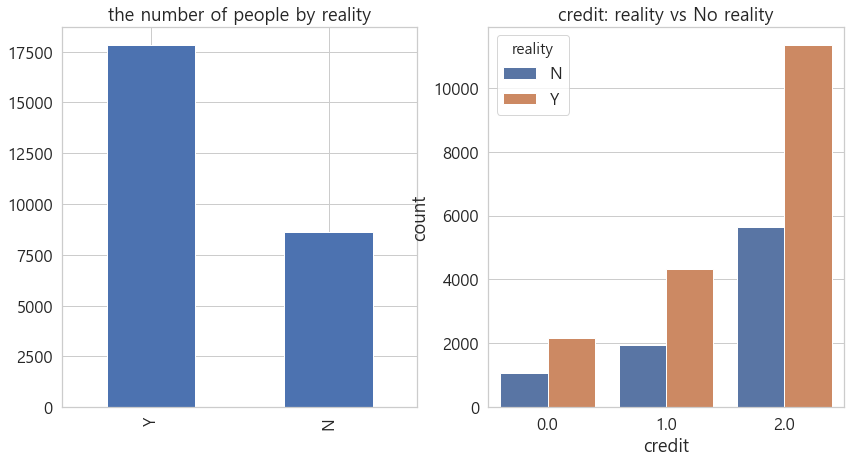

In [86]:
f,ax=plt.subplots(1,2,figsize=(14,7))

train['reality'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('the number of people by reality')

sns.countplot('credit',hue='reality',data=train,ax=ax[1])
ax[1].set_title('credit: reality vs No reality')

plt.show()

* 부동산 소유 여부 변수도 분포가 비슷해보임

### income_type

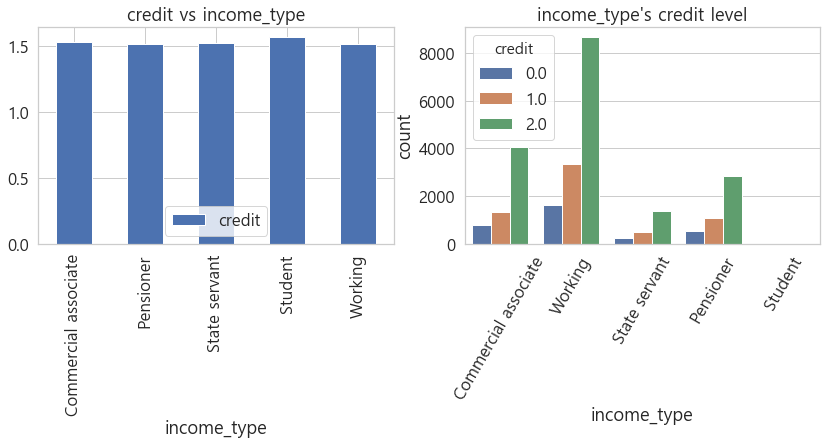

In [91]:
f,ax=plt.subplots(1,2,figsize=(14,4))

train[['income_type','credit']].groupby(['income_type']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs income_type')

sns.countplot('income_type',hue='credit',data=train,ax=ax[1])
ax[1].set_title("income_type's credit level")

plt.xticks(rotation=60)
plt.show()

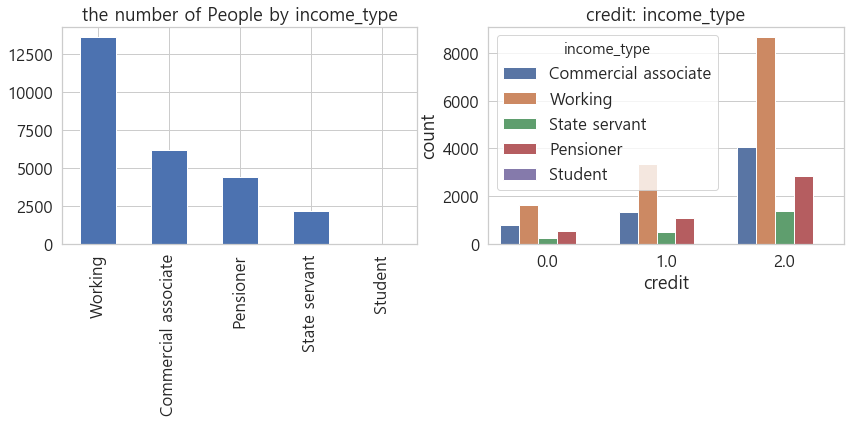

In [98]:
f,ax=plt.subplots(1,2,figsize=(14,4))

train['income_type'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('the number of People by income_type')

sns.countplot('credit',hue='income_type',data=train,ax=ax[1])
ax[1].set_title('credit: income_type')

plt.show()

In [94]:
train['income_type'].value_counts()

Working                 13645
Commercial associate     6201
Pensioner                4449
State servant            2154
Student                     7
Name: income_type, dtype: int64

* 역시 전체적인 신용도 분포는 다 비슷한 경향을 보임
* 이때, student의 표본이 너무 적어 적절한 분포일지에 대한 의문이 있음
* 보통 학생은 신용카드를 소지하는 경우가 많이 없다보니 생긴 불균형인듯함
* 아예 student는 제외하고 다른 value로 대체하는 것도 하나의 방법일 것 같음

### edu_type

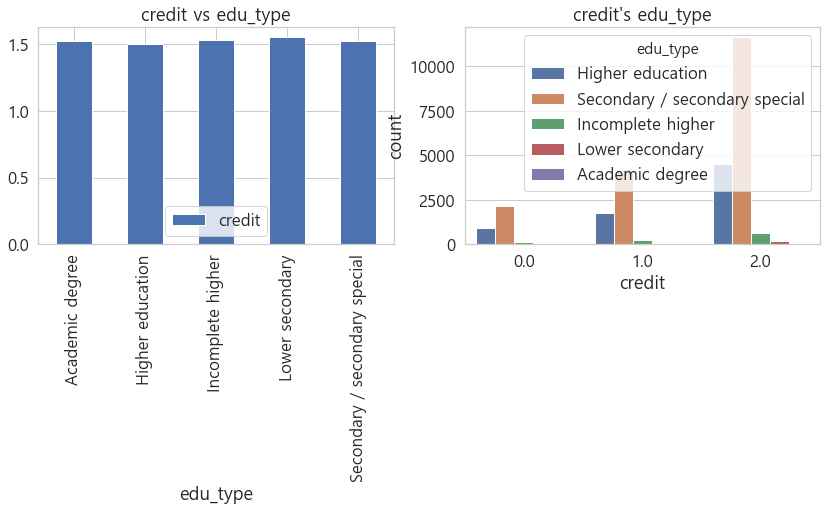

In [95]:
f,ax=plt.subplots(1,2,figsize=(14,4))

train[['edu_type','credit']].groupby(['edu_type']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs edu_type')

sns.countplot('credit',hue='edu_type',data=train,ax=ax[1])
ax[1].set_title("credit's edu_type")

plt.show()

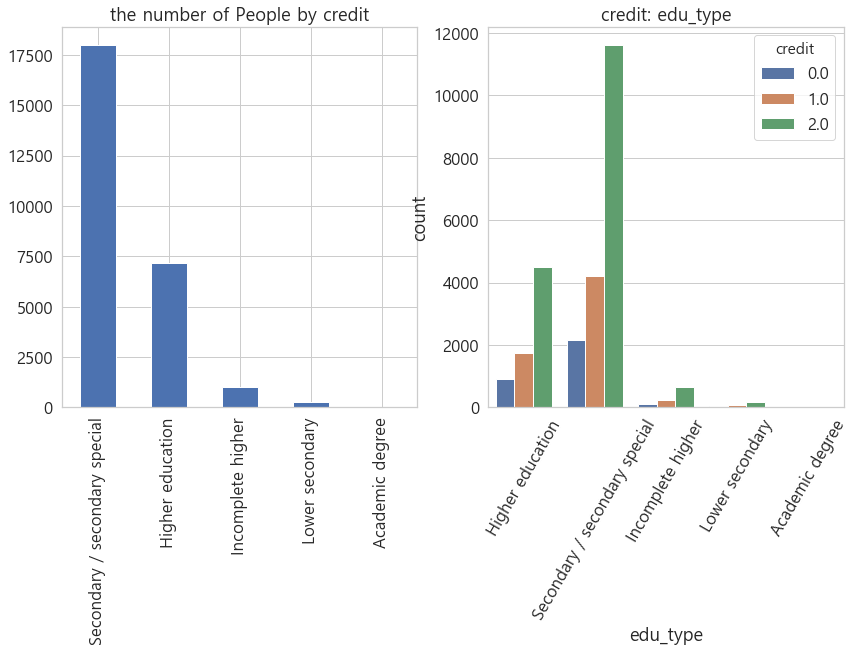

In [97]:
f,ax=plt.subplots(1,2,figsize=(14,7))

train['edu_type'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('the number of People by credit')

sns.countplot('edu_type',hue='credit',data=train,ax=ax[1])
ax[1].set_title('credit: edu_type')

plt.xticks(rotation=60)
plt.show()

In [99]:
train['edu_type'].value_counts()

Secondary / secondary special    17994
Higher education                  7162
Incomplete higher                 1020
Lower secondary                    257
Academic degree                     23
Name: edu_type, dtype: int64

* 역시 전체적인 신용도는 큰 차이가 없음
* 여기서도 Academic degree의 관측수가 너무 적어서 분포를 적절히 반영하고 있는지 불확실함
* 위에서 언급했듯이 edu_type은 교육수준을 나타내므로 인코딩시 순서를 고려해야 함

### family_type

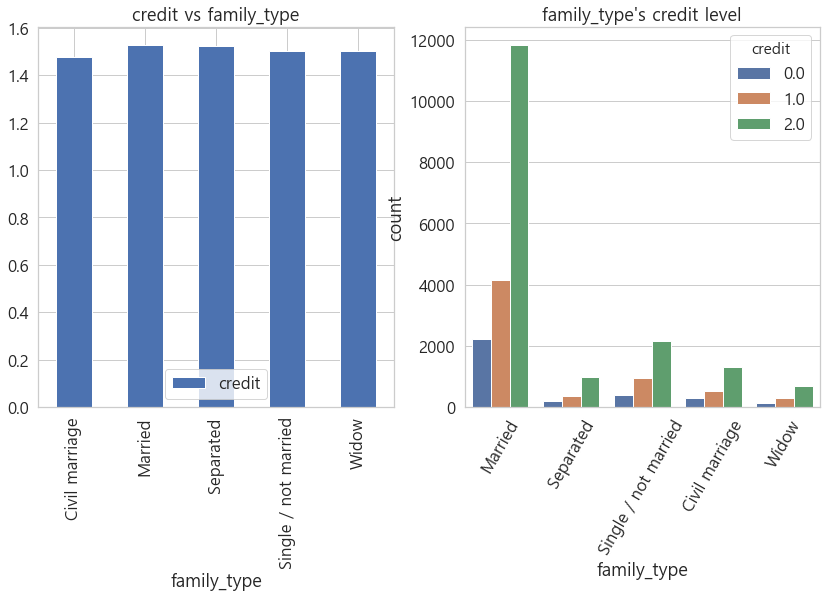

In [87]:
f,ax=plt.subplots(1,2,figsize=(14,7))

train[['family_type','credit']].groupby(['family_type']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs family_type')

sns.countplot('family_type',hue='credit',data=train,ax=ax[1])
ax[1].set_title("family_type's credit level")

plt.xticks(rotation=60)
plt.show()

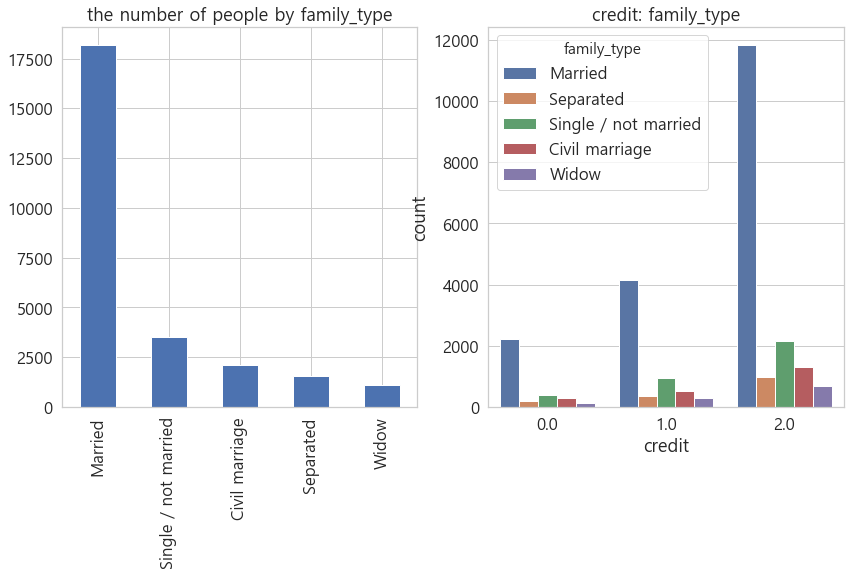

In [90]:
f,ax=plt.subplots(1,2,figsize=(14,7))

train['family_type'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('the number of people by family_type')

sns.countplot('credit',hue='family_type',data=train,ax=ax[1])
ax[1].set_title('credit: family_type')

plt.show()

* 가족 유형에 따른 신용도 분포는 조금 차이가 있는듯 하지만 역시 뚜렷해보이지는 않음

### house_type

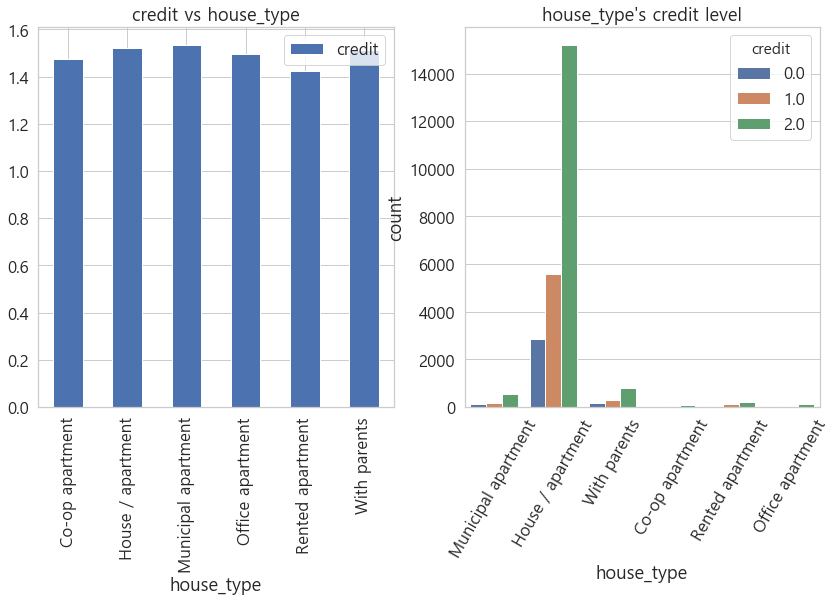

In [129]:
f,ax=plt.subplots(1,2,figsize=(14,7))

train[['house_type','credit']].groupby(['house_type']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs house_type')

sns.countplot('house_type',hue='credit',data=train,ax=ax[1])
ax[1].set_title("house_type's credit level")

plt.xticks(rotation=60)
plt.show()

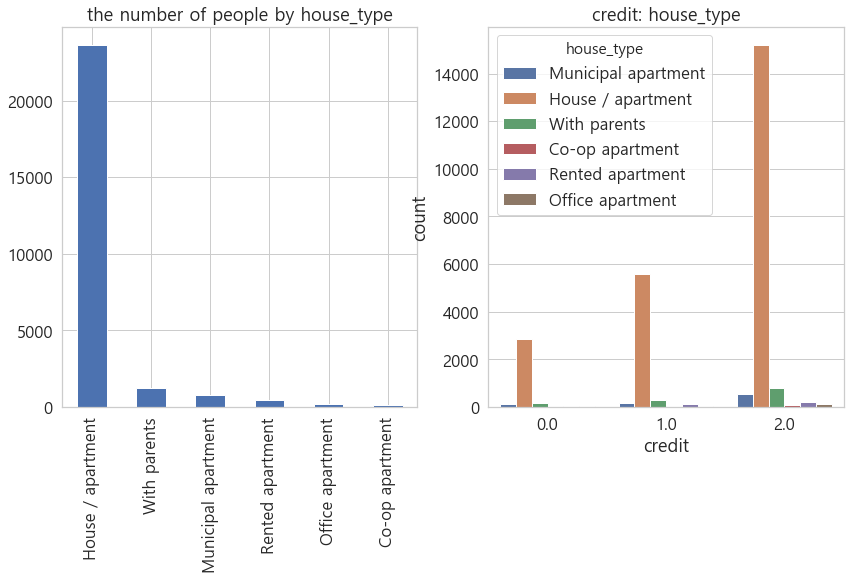

In [130]:
f,ax=plt.subplots(1,2,figsize=(14,7))

train['house_type'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('the number of people by house_type')

sns.countplot('credit',hue='house_type',data=train,ax=ax[1])
ax[1].set_title('credit: house_type')

plt.show()

* 주거 유형의 클래스가 너무 극단적으로 분포하고 있어 좋은 특징이 될 것 같지는 않음
* 자료 기입 자체의 오류가 아닐까 의심됨 - 범주 자체가 제대로 안 나뉜 것 같은데?

### occyp_type

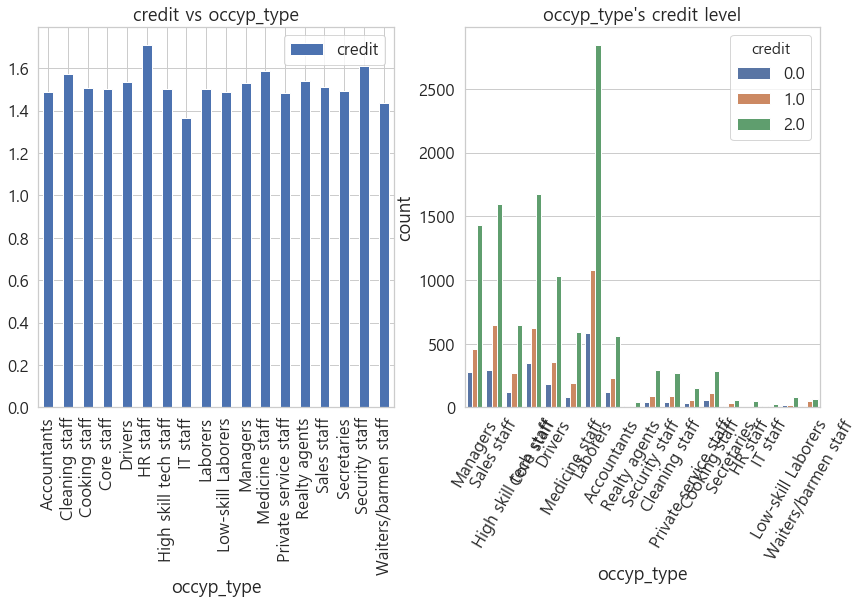

In [136]:
f,ax=plt.subplots(1,2,figsize=(14,7))

train[['occyp_type','credit']].groupby(['occyp_type']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs occyp_type')

sns.countplot('occyp_type',hue='credit',data=train,ax=ax[1])
ax[1].set_title("occyp_type's credit level")

plt.xticks(rotation=60)
plt.show()

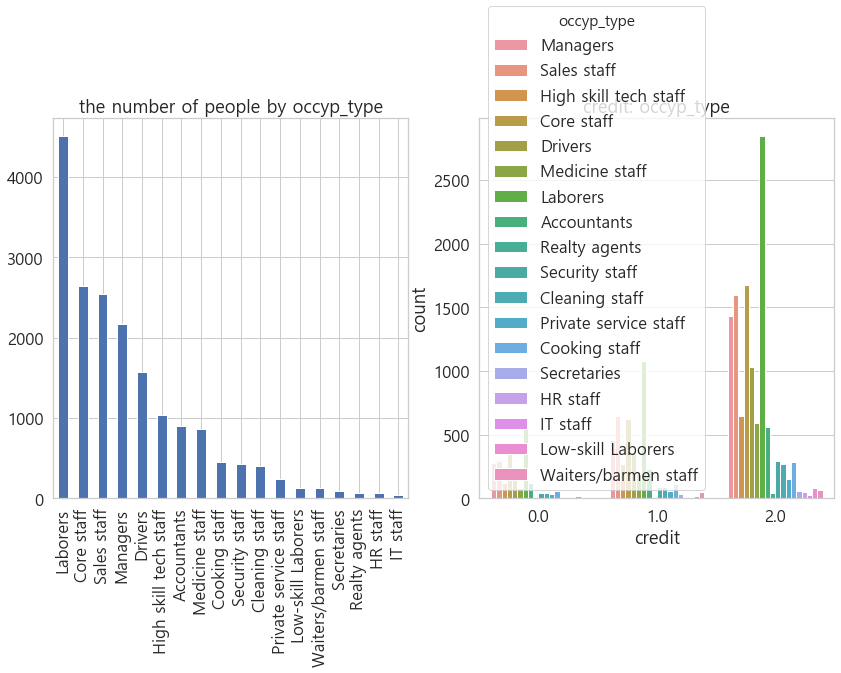

In [135]:
f,ax=plt.subplots(1,2,figsize=(14,7))

train['occyp_type'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('the number of people by occyp_type')

sns.countplot('credit',hue='occyp_type',data=train,ax=ax[1])
ax[1].set_title('credit: occyp_type')

plt.show()

* 직업 유형은 범주도 너무 많고 결측값도 많아서 특징으로 사용할 수 있을지 모르겠음
* 아예 미기입을 무직으로 보고 유직/무직으로 클래스를 나눠서 사용할 수도 있을 것 같음

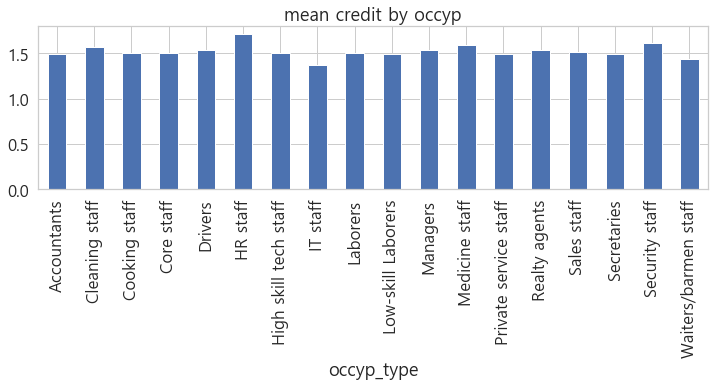

In [138]:
plt.figure(figsize=(12, 3))
train.groupby('occyp_type').credit.mean().plot.bar()
plt.title('mean credit by occyp')
plt.show()

In [139]:
print(train.groupby('occyp_type').credit.mean())

occyp_type
Accountants              1.486696
Cleaning staff           1.570720
Cooking staff            1.505470
Core staff               1.502646
Drivers                  1.535238
HR staff                 1.709677
High skill tech staff    1.503846
IT staff                 1.365854
Laborers                 1.500554
Low-skill Laborers       1.488189
Managers                 1.530226
Medicine staff           1.586806
Private service staff    1.485597
Realty agents            1.539683
Sales staff              1.513194
Secretaries              1.494845
Security staff           1.608491
Waiters/barmen staff     1.435484
Name: credit, dtype: float64


* 직종별 신용도를 본 결과, 조금씩 차이는 있는 것 같아서 궁금하긴 함
* IT 종사자가 가장 높은 신용도를, HR 종사자가 가장 낮은 신용도를 보임

### FLAG_MOBIL

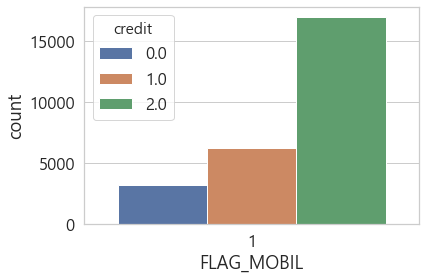

In [100]:
sns.countplot('FLAG_MOBIL',hue='credit',data=train)
plt.show()

* 처음에 살펴봤듯이 FLAG_MOBIL은 모두 1의 값을 가지므로 설명력없는 변수임
* 즉, 모든 사람이 핸드폰은 가지고 있음 

### work_phone

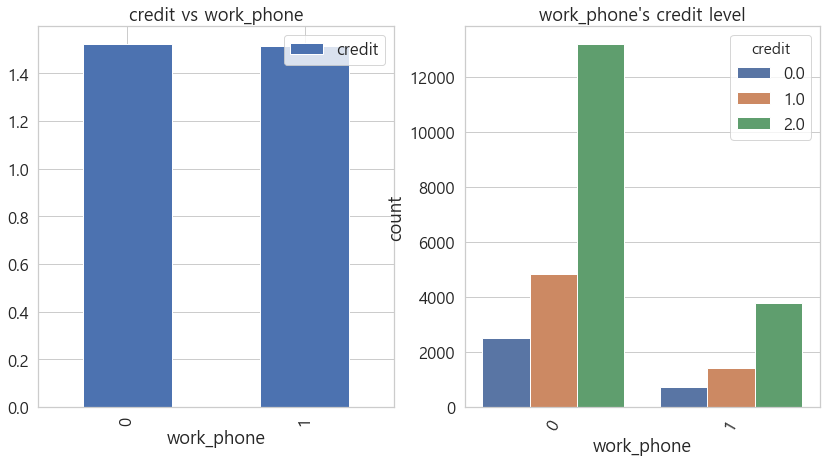

In [102]:
f,ax=plt.subplots(1,2,figsize=(14,7))

train[['work_phone','credit']].groupby(['work_phone']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs work_phone')

sns.countplot('work_phone',hue='credit',data=train,ax=ax[1])
ax[1].set_title("work_phone's credit level")

plt.xticks(rotation=60)
plt.show()

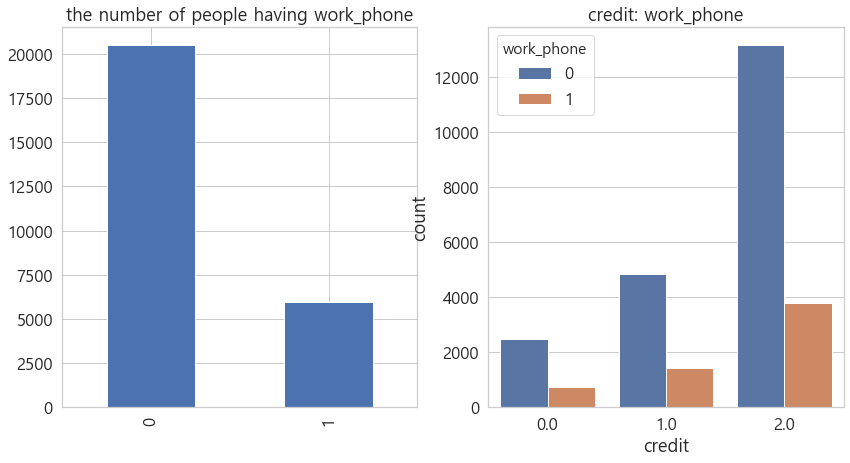

In [103]:
f,ax=plt.subplots(1,2,figsize=(14,7))

train['work_phone'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('the number of people having work_phone')

sns.countplot('credit',hue='work_phone',data=train,ax=ax[1])
ax[1].set_title('credit: work_phone')

plt.show()

* 업무용 전화 유무도 어떻게 이렇게 차이가 없을까 싶을정도로 비슷한 분포를 가짐

### phone

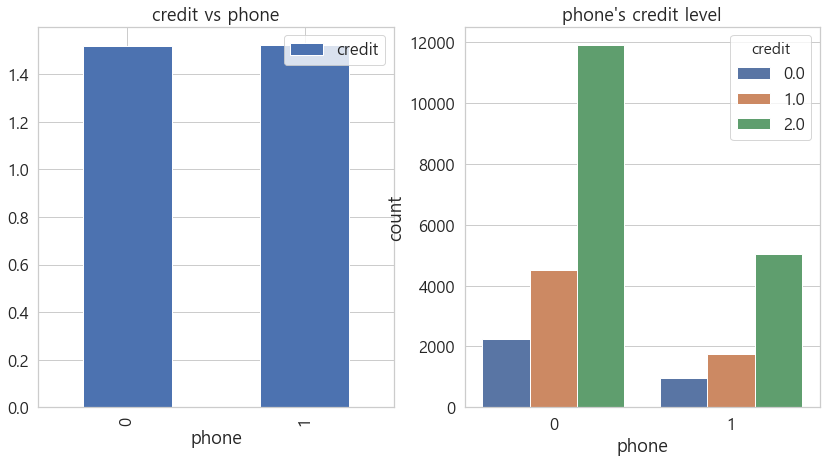

In [107]:
f,ax=plt.subplots(1,2,figsize=(14,7))

train[['phone','credit']].groupby(['phone']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs phone')

sns.countplot('phone',hue='credit',data=train,ax=ax[1])
ax[1].set_title("phone's credit level")

plt.show()

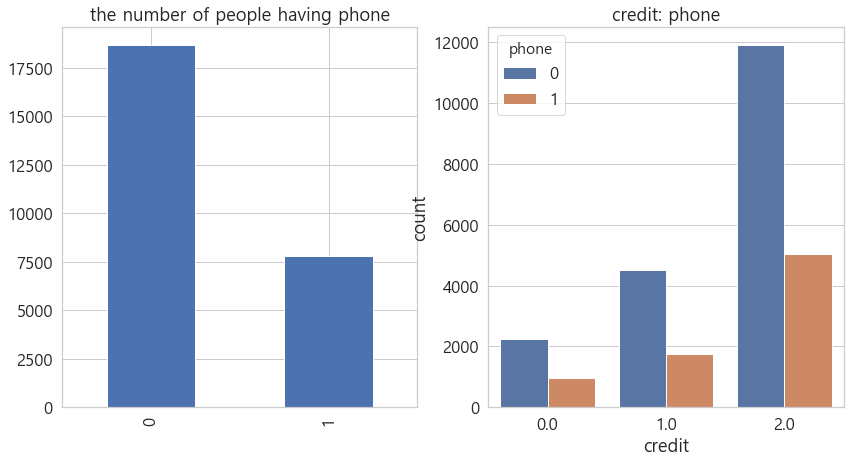

In [106]:
f,ax=plt.subplots(1,2,figsize=(14,7))

train['phone'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('the number of people having phone')

sns.countplot('credit',hue='phone',data=train,ax=ax[1])
ax[1].set_title('credit: phone')

plt.show()

* 전화 사용 유무도 분포 차이 없음

### email

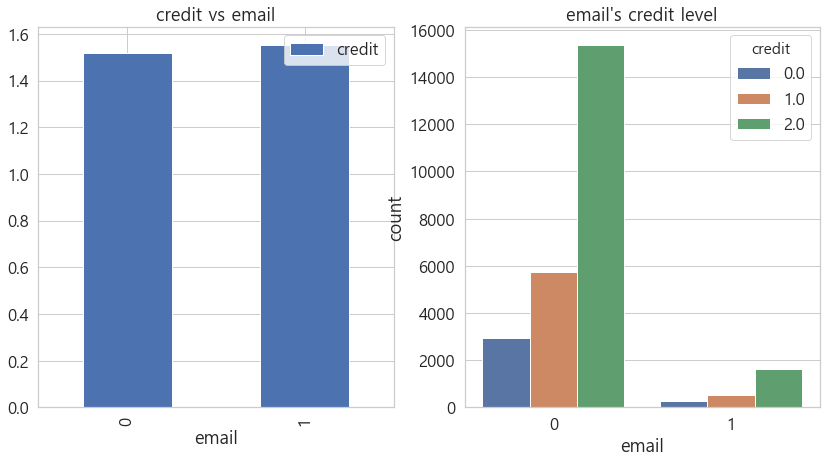

In [109]:
f,ax=plt.subplots(1,2,figsize=(14,7))

train[['email','credit']].groupby(['email']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs email')

sns.countplot('email',hue='credit',data=train,ax=ax[1])
ax[1].set_title("email's credit level")

plt.show()

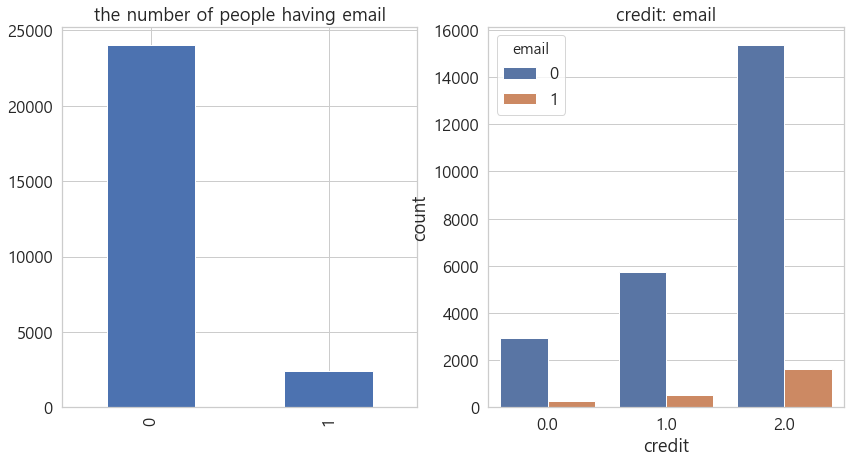

In [108]:
f,ax=plt.subplots(1,2,figsize=(14,7))

train['email'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('the number of people having email')

sns.countplot('credit',hue='email',data=train,ax=ax[1])
ax[1].set_title('credit: email')

plt.show()

* 이메일 사용 여부는 특히 불균형한 클래스를 가지는 듯함
* 역시 큰 차이는 없음

## Numerical Features

### child_num와 family_size

childnum unique: [ 0  2  1  3  4  5 14 19  7]
family size unique: [ 2.  4.  1.  3.  5.  6.  7. 15. 20.  9.]


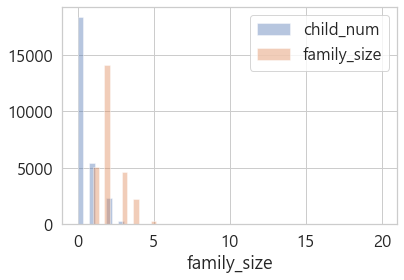

In [110]:
print('childnum unique:', train['child_num'].unique())
print('family size unique:', train['family_size'].unique())

sns.distplot(train['child_num'], kde=False, label='child_num')
sns.distplot(train['family_size'], kde=False, label='family_size')
plt.legend()

* *childnum의 14, 19 등의 값이나 family size의 15, 20 같은 값은 너무 극단적이지 않나?
* 신용카드 이용자라는 특성을 생각해봤을 때, 다른 사람의 명의로 카드를 만들었다던가 한 사람의 이름으로 여러 개의 카드를 만들어서 그런걸까?
* 아니면 가족을 정의하는 범위가 다른 건가? 자식의 아이도 세었다던가...
* 아무튼 정상적인 수치는 아닌 것 같음

In [111]:
# family_size - child_num
print('train', (train['family_size'] - train['child_num']).unique())
print('test', (test['family_size'] - test['child_num']).unique())

train [ 2.  1.  0. -1.]
test [ 2.  1. -1.  0.]


* 두 변수의 차이가 일정한 것을 보면 잘못 기입된 것 같지는 않음
* 근데 (가족의 수)-(아이의 수)가 음수인 경우는 무슨 일이지?

In [113]:
train_y[(train['family_size'] - train['child_num']).isin([0, -1])]

5825     2
14900    2
16110    2
16791    2
18879    2
21096    2
Name: credit, dtype: int32

In [114]:
test[(test['family_size'] - test['child_num']).isin([0, -1])]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
4918,31375,M,Y,N,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-14452,-4249,1,0,0,0,Drivers,1.0,-35.0
8246,34703,M,N,N,1,180000.0,Working,Secondary / secondary special,Married,House / apartment,-10656,-926,1,1,1,0,Laborers,1.0,-18.0


* 음수인 경우는 많지 않으며 모두 credit이 2로 나타남
* 우연일수도 있고 관련성이 있을 수도 있고?
* 일단 음수가 나타나는 점 자체가 자료가 잘못된 것일 수도 있고...

In [118]:
# 두 변수간의 상관관계
np.corrcoef(train['family_size'], train['child_num'])

array([[1.        , 0.89052762],
       [0.89052762, 1.        ]])

* family_size와 child_num의 상관계수가 약 0.89로 꽤 높은 상관성을 가짐
* 다중공선성 문제가 있을 수 있을 것 같음

### income_total

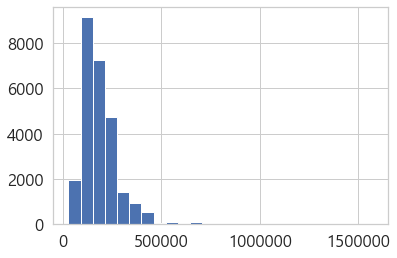

In [119]:
train['income_total'].hist(bins=25)

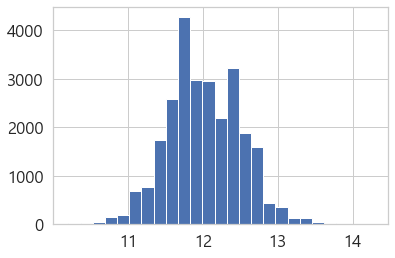

In [120]:
train['income_total'].apply(np.log).hist(bins=25)

* 총 소득의 경우 로그변환을 하면 정규분포에 가까워짐

Text(0.5, 1.0, 'y = 2')

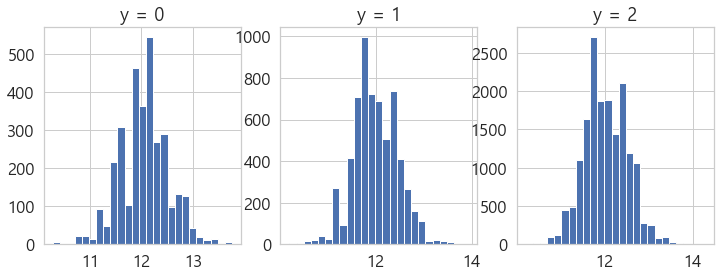

In [121]:
# credit에 따른 소득의 분포
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

train['income_total'].apply(np.log)[train_y==0].hist(bins=25, ax=axes[0])
train['income_total'].apply(np.log)[train_y==1].hist(bins=25, ax=axes[1])
train['income_total'].apply(np.log)[train_y==2].hist(bins=25, ax=axes[2])

axes[0].set_title('y = 0')
axes[1].set_title('y = 1')
axes[2].set_title('y = 2')

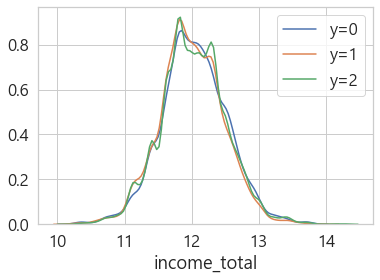

In [122]:
sns.distplot(train['income_total'].apply(np.log)[train_y==0], label='y=0', hist=False)
sns.distplot(train['income_total'].apply(np.log)[train_y==1], label='y=1', hist=False)
sns.distplot(train['income_total'].apply(np.log)[train_y==2], label='y=2', hist=False)
plt.legend()

* 분포가 크게 달라보이진 않음

### DAYS_BIRTH

In [123]:
# 날짜를 나이로 바꿔주는 사용자 정의 함수 정의
def days_to_age(x):
    return (x*-1)/365

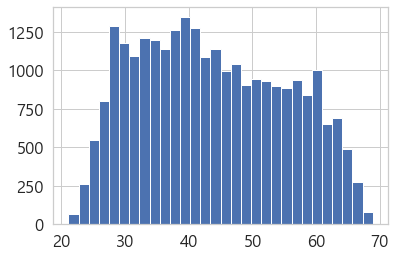

In [124]:
train['DAYS_BIRTH'].apply(days_to_age).hist(bins=30)

* 신용카드 소지자의 연령 분포 확인

In [126]:
bins = np.arange(2, 8)*10
labels = [str(s)+'\'s' for s in bins[:-1]]

df = train.copy()
df['age_groups'] = pd.cut(train['DAYS_BIRTH'].apply(days_to_age), bins, labels=labels)
print(df.groupby('age_groups').credit.mean())

age_groups
20's    1.496951
30's    1.501384
40's    1.538132
50's    1.529709
60's    1.532656
Name: credit, dtype: float64


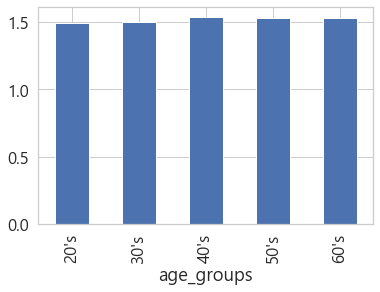

In [127]:
df.groupby('age_groups').credit.mean().plot.bar()

* 20~30대의 경우 credit이 더 낮게 나타나는 것을 보아 신용도가 조금 더 높은 경향이 있는 듯함
* 그렇다고 나이가 많이질수록 신용도가 낮아지는 식의 경향은 아님

### DAYS_EMPLOYED

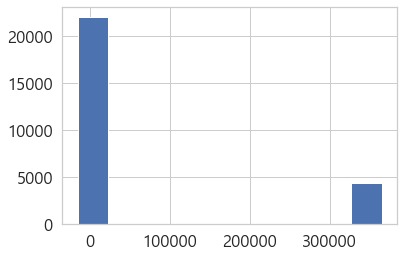

In [140]:
train['DAYS_EMPLOYED'].hist()

* *직장 경력에서 양수는 무직자라고 함

not working: 4438(16.775%)


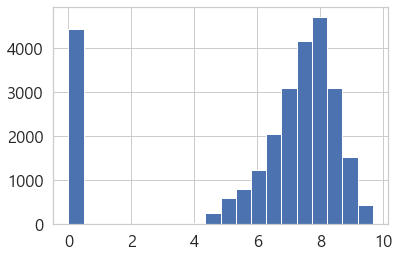

In [142]:
df = train['DAYS_EMPLOYED'].map(lambda x: x if x < 0 else 0).apply(lambda x: np.log1p(x*-1))
df.hist(bins=20)
print(f'not working: {np.sum(df==0)}({round(np.sum(df==0)/len(df)*100, 3)}%)')

* 0을 무직자로 변환하고 로그를 취함

not working credit mean :  1.5141955835962144
working credit mean :  1.52066491052775


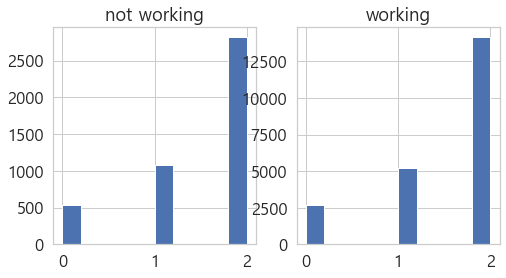

In [143]:
print('not working credit mean : ', train_y[df==0].mean())
print('working credit mean : ', train_y[df!=0].mean())

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
train_y[df==0].hist(ax=axes[0])
train_y[df!=0].hist(ax=axes[1])

axes[0].set_title('not working')
axes[1].set_title('working')

plt.show()

* 변환 결과, 무직자와 유직자의 신용도 분포가 비슷함을 확인
* 상식적으로는 유직자의 신용도가 더 좋을 거라고 생각되는데 의외의 결과인듯

### begin_month

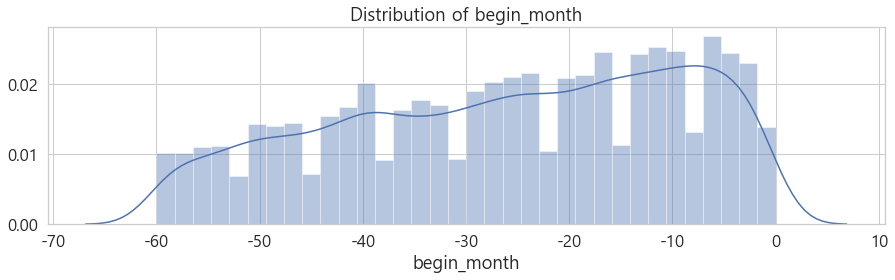

In [146]:
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
sns.distplot(train['begin_month'])
plt.title("Distribution of begin_month")
plt.show()

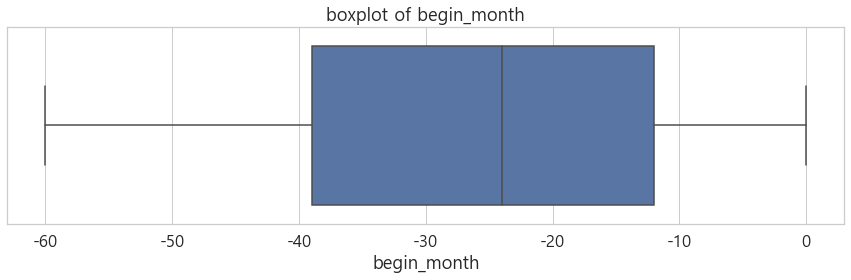

In [147]:
plt.figure(figsize=(15,8))
plt.subplot(2,1,2)
sns.boxplot(train['begin_month'])
plt.title("boxplot of begin_month")
plt.show()

* 신용카드를 이용한 개월 수를 나타내는 변수인듯?

Text(0.5, 1.0, 'y = 2')

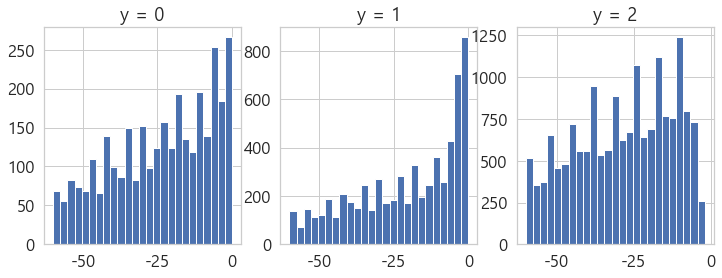

In [150]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

train['begin_month'][train_y==0].hist(bins=25, ax=axes[0])
train['begin_month'][train_y==1].hist(bins=25, ax=axes[1])
train['begin_month'][train_y==2].hist(bins=25, ax=axes[2])

axes[0].set_title('y = 0')
axes[1].set_title('y = 1')
axes[2].set_title('y = 2')

* 전체적인 분포는 비슷해보이는데... 잘 모르겠다

## Heatmap

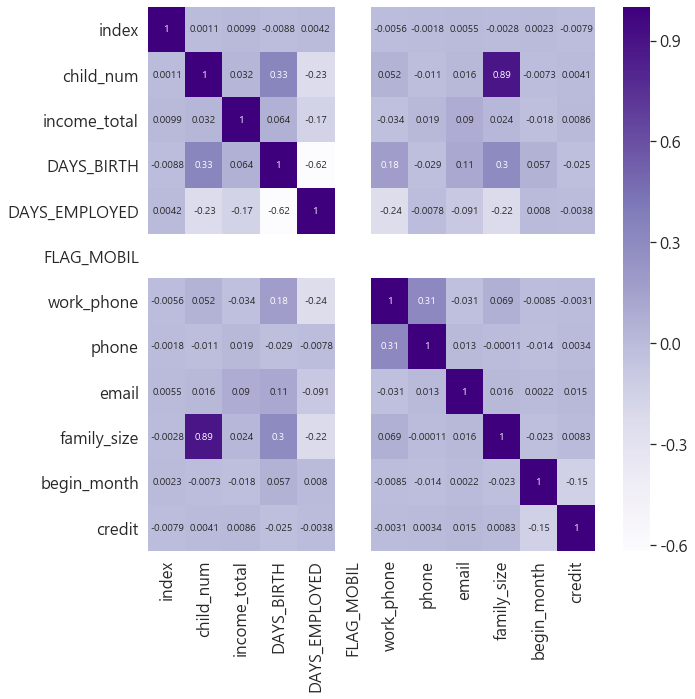

In [151]:
plt.figure(figsize=(10,10))
cor=train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Purples)
plt.show()

* 이렇게 보면 괜찮은 상관관계를 가지는 변수가 없어보이는데 모델링하면 또 다를라나?